In [5]:
#morph volumetric estimates
import os.path as op
import mne



import nibabel as nib
from nilearn.plotting import plot_glass_brain







In [6]:
subjects = ['patient_05_part1L',
            'patient_05_part1R',
            'patient_05_part2L',
            'patient_05_part2R',
            'patient_06',
            'patient_08',
            'patient_10',
            'patient_11_part1',
            'patient_11_part2',
            'patient_13',
            'patient_14_part1_left',
            'patient_14_part2_left',
            'patient_14_part1_right',
            'patient_14_part2_right',
            'patient_16',
            'patient_17',
            'patient_21',
            'patient_22',
            'patient_23',
            'patient_25',
            ]

In [7]:
target_subject = "fsaverage"
data_path = "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS"
subjects_dir = op.join(data_path, "freesurfer", "recons")

In [8]:
for subject in subjects:
    base_subject = subject.split("_part")[0] 

    #load the stc -> the neural actvity
    stc_fname = op.join(data_path, "stc_files", "theta", f'theta_{subject}-vl.stc')
    stc = mne.read_source_estimate(stc_fname, subject=base_subject)

    #recreate the src -> the brain grid
    surface = op.join(subjects_dir, base_subject , "bem" , "inner_skull.surf")
    src = mne.setup_volume_source_space(
        base_subject, subjects_dir=subjects_dir, pos=10.0, surface=surface, add_interpolator=True
    )


    #morph it
    morph = mne.compute_source_morph(
        src = src,
        subject_from=base_subject, 
        subject_to=target_subject,
        subjects_dir=subjects_dir, verbose=True
    )

    stc_fsaverage = morph.apply(stc)

    #save it
    stc_fsaverage.save(f"/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/morphed_stc/theta/theta_{subject}_to_fsaverage", overwrite=True)

    #save as a nifti file
    img_fsaverage = morph.apply(stc, mri_resolution=2, output="nifti1")
    output_path = f"/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/morphed_niftis/theta/theta_{subject}_to_fsaverage.nii.gz"
    nib.save(img_fsaverage, output_path)

    

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.6  -16.9   16.6) mm
Surface fits inside a sphere with radius   96.0 mm
Surface extent:
    x =  -76.5 ...   76.1 mm
    y =  -98.7 ...   78.7 mm
    z =  -56.6 ...   85.9 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -100.0 ...   80.0 mm
    z =  -60.0 ...   90.0 mm
5168 sources before omitting any.
3485 sources after omitting infeasible sources not within 0.0 - 96.0 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.6  -16.9   16.6) mm
Surface fits inside a sphere with radius   96.0 mm
Surface extent:
    x =  -76.5 ...   76.1 mm
    y =  -98.7 ...   78.7 mm
    z =  -56.6 ...   85.9 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -100.0 ...   80.0 mm
    z =  -60.0 ...   90.0 mm
5168 sources before omitting any.
3485 sources after omitting infeasible sources not within 0.0 - 96.0 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.6  -16.9   16.6) mm
Surface fits inside a sphere with radius   96.0 mm
Surface extent:
    x =  -76.5 ...   76.1 mm
    y =  -98.7 ...   78.7 mm
    z =  -56.6 ...   85.9 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -100.0 ...   80.0 mm
    z =  -60.0 ...   90.0 mm
5168 sources before omitting any.
3485 sources after omitting infeasible sources not within 0.0 - 96.0 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_05/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.6  -16.9   16.6) mm
Surface fits inside a sphere with radius   96.0 mm
Surface extent:
    x =  -76.5 ...   76.1 mm
    y =  -98.7 ...   78.7 mm
    z =  -56.6 ...   85.9 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -100.0 ...   80.0 mm
    z =  -60.0 ...   90.0 mm
5168 sources before omitting any.
3485 sources after omitting infeasible sources not within 0.0 - 96.0 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_06/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_06/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_06/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_06/bem/inner_skull.surf (10242 nodes)
Surface CM = (   1.4  -12.3   27.7) mm
Surface fits inside a sphere with radius   93.4 mm
Surface extent:
    x =  -72.6 ...   72.8 mm
    y =  -89.8 ...   78.7 mm
    z =  -43.2 ...   93.1 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -50.0 ...  100.0 mm
4896 sources before omitting any.
3242 sources after omitting infeasible sources not within 0.0 - 93.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_08/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_08/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_08/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_08/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -2.9  -12.1   25.8) mm
Surface fits inside a sphere with radius   84.9 mm
Surface extent:
    x =  -74.0 ...   71.8 mm
    y =  -86.2 ...   70.3 mm
    z =  -41.5 ...   97.4 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -50.0 ...  100.0 mm
4896 sources before omitting any.
2551 sources after omitting infeasible sources not within 0.0 - 84.9 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_10/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_10/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_10/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_10/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.2  -15.8   31.6) mm
Surface fits inside a sphere with radius   86.1 mm
Surface extent:
    x =  -79.2 ...   79.2 mm
    y =  -90.5 ...   68.5 mm
    z =  -41.3 ...   96.8 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -100.0 ...   70.0 mm
    z =  -50.0 ...  100.0 mm
4896 sources before omitting any.
2630 sources after omitting infeasible sources not within 0.0 - 86.1 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/bem/inner_skull.surf (10242 nodes)
Surface CM = ( -13.6   -7.1    7.7) mm
Surface fits inside a sphere with radius  100.7 mm
Surface extent:
    x =  -85.9 ...   76.9 mm
    y =  -85.1 ...   75.9 mm
    z =  -87.4 ...   98.2 mm
Grid extent:
    x =  -90.0 ...   80.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -90.0 ...  100.0 mm
6480 sources before omitting any.
4105 sources after omitting infeasible sources not within 0.0 - 100.7 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface a

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_11/bem/inner_skull.surf (10242 nodes)
Surface CM = ( -13.6   -7.1    7.7) mm
Surface fits inside a sphere with radius  100.7 mm
Surface extent:
    x =  -85.9 ...   76.9 mm
    y =  -85.1 ...   75.9 mm
    z =  -87.4 ...   98.2 mm
Grid extent:
    x =  -90.0 ...   80.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -90.0 ...  100.0 mm
6480 sources before omitting any.
4105 sources after omitting infeasible sources not within 0.0 - 100.7 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface a

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_13/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_13/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_13/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_13/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -7.4  -10.9   16.5) mm
Surface fits inside a sphere with radius   89.1 mm
Surface extent:
    x =  -78.6 ...   64.4 mm
    y =  -87.6 ...   77.8 mm
    z =  -56.4 ...  101.6 mm
Grid extent:
    x =  -80.0 ...   70.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -60.0 ...  110.0 mm
5184 sources before omitting any.
2902 sources after omitting infeasible sources not within 0.0 - 89.1 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.8  -16.7   18.2) mm
Surface fits inside a sphere with radius   79.4 mm
Surface extent:
    x =  -71.5 ...   75.8 mm
    y =  -81.8 ...   61.6 mm
    z =  -48.8 ...   90.2 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   70.0 mm
    z =  -50.0 ...  100.0 mm
4624 sources before omitting any.
2088 sources after omitting infeasible sources not within 0.0 - 79.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.8  -16.7   18.2) mm
Surface fits inside a sphere with radius   79.4 mm
Surface extent:
    x =  -71.5 ...   75.8 mm
    y =  -81.8 ...   61.6 mm
    z =  -48.8 ...   90.2 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   70.0 mm
    z =  -50.0 ...  100.0 mm
4624 sources before omitting any.
2088 sources after omitting infeasible sources not within 0.0 - 79.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.8  -16.7   18.2) mm
Surface fits inside a sphere with radius   79.4 mm
Surface extent:
    x =  -71.5 ...   75.8 mm
    y =  -81.8 ...   61.6 mm
    z =  -48.8 ...   90.2 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   70.0 mm
    z =  -50.0 ...  100.0 mm
4624 sources before omitting any.
2088 sources after omitting infeasible sources not within 0.0 - 79.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_14/bem/inner_skull.surf (10242 nodes)
Surface CM = (   0.8  -16.7   18.2) mm
Surface fits inside a sphere with radius   79.4 mm
Surface extent:
    x =  -71.5 ...   75.8 mm
    y =  -81.8 ...   61.6 mm
    z =  -48.8 ...   90.2 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   70.0 mm
    z =  -50.0 ...  100.0 mm
4624 sources before omitting any.
2088 sources after omitting infeasible sources not within 0.0 - 79.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_16/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_16/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_16/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_16/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -9.3   -4.4  -19.2) mm
Surface fits inside a sphere with radius   96.0 mm
Surface extent:
    x =  -73.7 ...   78.0 mm
    y =  -88.0 ...   86.6 mm
    z =  -93.2 ...   66.1 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   90.0 mm
    z = -100.0 ...   70.0 mm
5814 sources before omitting any.
3560 sources after omitting infeasible sources not within 0.0 - 96.0 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_17/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_17/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_17/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_17/bem/inner_skull.surf (10242 nodes)
Surface CM = ( -10.7   -0.6  -20.5) mm
Surface fits inside a sphere with radius   98.1 mm
Surface extent:
    x =  -71.7 ...   78.0 mm
    y =  -85.9 ...   85.1 mm
    z =  -94.5 ...   68.1 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   90.0 mm
    z = -100.0 ...   70.0 mm
5814 sources before omitting any.
3716 sources after omitting infeasible sources not within 0.0 - 98.1 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_21/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_21/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_21/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_21/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -5.0   -2.9  -13.1) mm
Surface fits inside a sphere with radius   99.1 mm
Surface extent:
    x =  -74.2 ...   78.5 mm
    y =  -88.6 ...   92.0 mm
    z =  -73.3 ...   62.3 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...  100.0 mm
    z =  -80.0 ...   70.0 mm
5440 sources before omitting any.
3701 sources after omitting infeasible sources not within 0.0 - 99.1 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_22/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_22/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_22/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_22/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -6.6   -7.0   -9.8) mm
Surface fits inside a sphere with radius   94.5 mm
Surface extent:
    x =  -63.1 ...   68.6 mm
    y =  -81.5 ...   73.5 mm
    z =  -73.6 ...   77.1 mm
Grid extent:
    x =  -70.0 ...   70.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -80.0 ...   80.0 mm
4590 sources before omitting any.
3207 sources after omitting infeasible sources not within 0.0 - 94.5 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_23/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_23/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_23/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_23/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -4.8   -0.9   -9.0) mm
Surface fits inside a sphere with radius   96.9 mm
Surface extent:
    x =  -67.0 ...   71.0 mm
    y =  -84.7 ...   90.5 mm
    z =  -70.1 ...   75.6 mm
Grid extent:
    x =  -70.0 ...   80.0 mm
    y =  -90.0 ...  100.0 mm
    z =  -80.0 ...   80.0 mm
5440 sources before omitting any.
3482 sources after omitting infeasible sources not within 0.0 - 96.9 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_25/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_25/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_25/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/patient_25/bem/inner_skull.surf (10242 nodes)
Surface CM = ( -16.7   -1.5  -46.5) mm
Surface fits inside a sphere with radius  112.5 mm
Surface extent:
    x =  -97.5 ...   72.3 mm
    y =  -85.8 ...   79.8 mm
    z = -126.4 ...   56.7 mm
Grid extent:
    x = -100.0 ...   80.0 mm
    y =  -90.0 ...   80.0 mm
    z = -130.0 ...   60.0 mm
6840 sources before omitting any.
5214 sources after omitting infeasible sources not within 0.0 - 112.5 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface a

  0%|          | Time : 0/1 [00:00<?,       ?it/s]

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

In [7]:
subject = "Patient_06"  
target_subject = "fsaverage"
data_path = "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS"
subjects_dir = op.join(data_path, "freesurfer", "recons")


#load the stc -> the neural actvity
stc_fname = op.join(data_path, "stc_files", f'{subject}-vl.stc')
stc = mne.read_source_estimate(stc_fname, subject=subject)

#recreate the src -> the brain grid
surface = op.join(subjects_dir, subject , "bem" , "inner_skull.surf")
src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, pos=10.0, surface=surface, add_interpolator=True
)





Boundary surface file : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/Patient_06/bem/inner_skull.surf
grid                  : 10.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/Patient_06/mri/T1.mgz

Reading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/Patient_06/mri/T1.mgz...

Loaded bounding surface from /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/Patient_06/bem/inner_skull.surf (10242 nodes)
Surface CM = (   1.4  -12.3   27.7) mm
Surface fits inside a sphere with radius   93.4 mm
Surface extent:
    x =  -72.6 ...   72.8 mm
    y =  -89.8 ...   78.7 mm
    z =  -43.2 ...   93.1 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y =  -90.0 ...   80.0 mm
    z =  -50.0 ...  100.0 mm
4896 sources before omitting any.
3242 sources after omitting infeasible sources not within 0.0 - 93.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface an

In [8]:

#morph it
morph = mne.compute_source_morph(
    src = src,
    subject_from=subject, 
    subject_to=target_subject,
    subjects_dir=subjects_dir, verbose=True
)

stc_fsaverage = morph.apply(stc)

Volume source space(s) present...
    Loading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/Patient_06/mri/brain.mgz as "from" volume
    Loading /Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/fsaverage/mri/brain.mgz as "to" volume
Computing registration...
Reslicing to zooms=(5.0, 5.0, 5.0) for translation ...
Optimizing translation:
    Optimizing level 2 [max iter: 100]
    Optimizing level 1 [max iter: 100]
    Optimizing level 0 [max iter: 10]
    Translation:   14.8 mm
    R²:            85.9%
Optimizing rigid:
    Optimizing level 2 [max iter: 100]
    Optimizing level 1 [max iter: 100]
    Optimizing level 0 [max iter: 10]
    Translation:   14.8 mm
    Rotation:       0.1°
    R²:            85.9%
Optimizing affine:
    Optimizing level 2 [max iter: 100]
    Optimizing level 1 [max iter: 100]
    Optimizing level 0 [max iter: 10]
    R²:            95.4%
Optimizing sdr:
    R²:            98.2%
Computing nonzero vertices after morph ...
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

In [9]:
#save it
stc_fsaverage.save(f"/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/morphed_stc/{subject}_to_fsaverage", overwrite=True)

#save as a nifti file
img_fsaverage = morph.apply(stc, mri_resolution=2, output="nifti1")
output_path = f"/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/morphed_niftis/{subject}_to_fsaverage.nii.gz"
nib.save(img_fsaverage, output_path)

Writing STC to disk...
Overwriting existing file.
[done]


  0%|          | Time : 0/1 [00:00<?,       ?it/s]

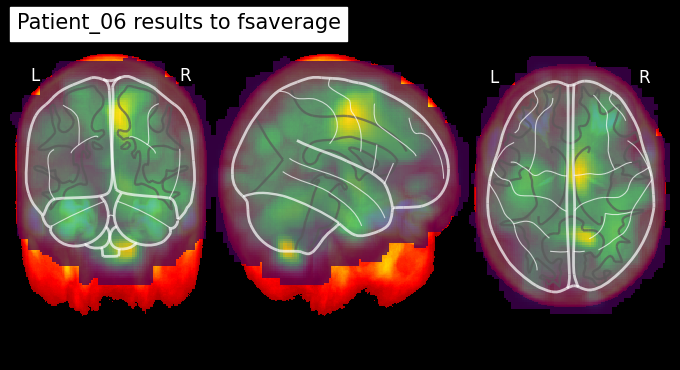

In [10]:
#plot it 
fname_t1_fsaverage = "/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/freesurfer/recons/fsaverage/mri/T1.mgz"
t1_fsaverage = nib.load(fname_t1_fsaverage)
img_fsaverage = nib.load(f"/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/morphed_niftis/{subject}_to_fsaverage.nii.gz")


display = plot_glass_brain(
    t1_fsaverage,
    title=f"{subject} results to fsaverage",
    draw_cross=False,
    annotate=True,
    black_bg=True  # Optional: makes overlay pop
)

# Add your source-localized activity
display.add_overlay(img_fsaverage, alpha=0.75)